# Single Layer Neural Network

In [98]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# Input features and target output

train_X = np.array([[0,0],[0,1],[1,0],[1,1]])
train_Y = np.array([[0,1,1,1]])

train_Y = train_Y.reshape(4,1)

In [12]:
# Activation function

def sigmoid(z):

  val = 1/(1+np.exp(-z))

  return val

In [28]:
# Initializing parameters

def init_parameters(dim):

  w = np.random.randn(dim,1)
  b = 0

  return w,b

In [29]:
w, b = init_parameters(4)

print("w = " + str(w))
print("b = " + str(b))

w = [[-0.17334324]
 [-0.11705563]
 [-1.02097082]
 [ 0.07737618]]
b = 0.2


In [47]:
# Propagation

def propagate(w,b,X,Y):

  # no. of training examples
  m = X.shape[1]

  # forward propagation
  z = np.dot(w.T,X) + b
  A = sigmoid(z)

  cost = (-1/m) * np.sum((Y * np.log(A)) + ((1-Y) * np.log(1-A)))

  # backward propagation
  dw = (1/m) * np.dot(X,(A-Y).T)
  db = (1/m) * np.sum(A-Y)

  cost = np.squeeze(cost)

  grads = {"dw": dw,
           "db": db}

  return grads, cost

In [48]:
w, b, X, Y = np.random.randn(5,1), 0, np.random.randn(5,2), np.random.randn(4,1)
grads, cost = propagate(w,b,X,Y)

print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))

dw = [[ 0.56809989  0.89513801  0.64957795  0.06816779]
 [ 0.69290228  1.37469456  0.86276355 -0.34933051]
 [-0.34413554 -0.57214244 -0.40094103  0.00441088]
 [ 0.14509999  0.21348707  0.1621379   0.04055897]
 [-0.09803055 -0.23721785 -0.13270758  0.11474038]]
db = 3.5650552291426276
cost = 0.223390880684196


In [95]:
# Update parameters

def update_parameters(w, b, X, Y, num_iterations, alpha):

  costs = []

  for i in range(num_iterations):

    grads, cost = propagate(w,b,X,Y)

    dw = grads["dw"]
    db = grads["db"]

    w = w - alpha*dw
    b = b - alpha*db

    if i%100 == 0:
      costs.append(cost)

    if i%100 == 0:
      print("cost after iteration %i: %f" %(i,cost))

    params = {"w": w, 
              "b": b}
    
    grads = {"dw": dw,
             "db": db}

  return params, grads, costs

In [91]:
params, grads, costs = update_parameters(w, b, X, Y, 100, 0.2)

print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))

cost after iteration 0: 0.223391
cost after iteration 10: -19.164993
cost after iteration 20: -35.114880
cost after iteration 30: -51.035553
cost after iteration 40: -66.954632
cost after iteration 50: -82.873603
cost after iteration 60: -98.792566
cost after iteration 70: -114.711529
cost after iteration 80: -130.630491
cost after iteration 90: -146.549454
w = [[ -3.6741831  -10.19050633  -5.29629619   6.22723755]
 [-10.43052741 -24.05386231 -13.82405548  10.37166209]
 [  5.27810631   9.82526782   6.41027353  -1.64197253]
 [ -0.0471885   -1.40776222  -0.38575607   2.01472629]
 [  2.12968315   4.91427175   2.8235143   -2.1312229 ]]
b = -44.24034955827079
dw = [[ 0.22801882  0.55505693  0.30949687 -0.27191329]
 [ 0.47536192  1.1571542   0.64522319 -0.56687086]
 [-0.15897187 -0.38697877 -0.21577736  0.18957455]
 [ 0.04768111  0.11606819  0.06471902 -0.0568599 ]
 [-0.09704473 -0.23623203 -0.13172176  0.1157262 ]]
db = 2.1795386529531564


In [88]:
# Predict

def predict(w, b, X):

  Yhat = np.zeros((1,X.shape[1]))

  A = sigmoid(np.dot(w.T,X) + b)

  for i in range(A.shape[1]):

    if A[0,i] <= 0.5:
      Yhat[0,i] = 0

    else:
      Yhat[0,i] = 1

    return Yhat

In [89]:
print("predictions: " + str(predict(w,b,X)))

predictions: [[1. 0.]]


In [116]:
# Final model

def nn_model(train_X, train_Y, num_iterations=100, alpha=0.01):

  # Initializing parameters
  w, b = init_parameters(train_X.shape[0])

  # gradient descent
  params, grads, costs = update_parameters(w, b, train_X, train_Y, num_iterations, alpha)

  # learned parameters
  w = params["w"]
  b = params["b"]

  # predict
  Y_prediction = predict(w, b, train_X)

  # plot learning curve
  costs = np.squeeze(costs)
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('per hundred iterations')
  plt.title("Learning Rate = " + str(alpha))
  plt.show()

  return


cost after iteration 0: 2.258081
cost after iteration 100: 1.883120
cost after iteration 200: 1.585187
cost after iteration 300: 1.350739
cost after iteration 400: 1.166012
cost after iteration 500: 1.019209
cost after iteration 600: 0.901118
cost after iteration 700: 0.804852
cost after iteration 800: 0.725344
cost after iteration 900: 0.658860
cost after iteration 1000: 0.602632
cost after iteration 1100: 0.554584
cost after iteration 1200: 0.513138
cost after iteration 1300: 0.477083
cost after iteration 1400: 0.445475
cost after iteration 1500: 0.417571
cost after iteration 1600: 0.392780
cost after iteration 1700: 0.370626
cost after iteration 1800: 0.350725
cost after iteration 1900: 0.332759


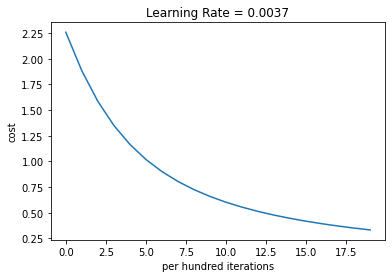

In [117]:
nn_model(train_X, train_Y, num_iterations = 2000, alpha = 0.0037)